In [84]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

sample = samples[2]
sample_short = ''.join(sample.split('.')[:-1])
sample_pool = sample.replace('-', '').replace('.', '')

In [86]:
path = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_summary_plotting.tsv.gz'

In [87]:
path

'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_d4aee54_GTEXcore/G_TCGA-AO-A0JM-01A-21R-A056-07_summary_plotting.tsv.gz'

In [88]:
df = pd.read_csv(path, compression="gzip")

df['junctionAnnotated'] = df['junctionAnnotated'].astype(str)

df['readFrameAnnotated'] = df['readFrameAnnotated'].astype(str)
display(df.head())

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAAOA0JM01A21RA05607all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples
0,1,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,8.0,1.8,5876.76,0,1,971.0
1,2,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,8.0,1.8,5876.76,0,1,971.0
2,3,58,0,0,0,ENSG00000011304.20,805187_805512,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0
3,3,1,0,0,0,ENSG00000011304.20,805516_805555,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0
4,5,58,0,0,1,ENSG00000011304.20,805187_805512,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0


In [135]:
df['junctionAnnotated_readFrameAnnotated'] = df['junctionAnnotated'] + '_' +  df['readFrameAnnotated']

In [136]:
df.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAAOA0JM01A21RA05607all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples,junctionAnnotated_readFrameAnnotated
0,1,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,8.0,1.8,5876.76,0,1,971.0,1_0
1,2,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,8.0,1.8,5876.76,0,1,971.0,1_0
2,3,58,0,0,0,ENSG00000011304.20,805187_805512,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0,1_0
3,3,1,0,0,0,ENSG00000011304.20,805516_805555,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0,1_0
4,5,58,0,0,1,ENSG00000011304.20,805187_805512,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0,1_0


In [137]:
df.loc[(df['readFrameAnnotated'] == '1') & (df['junctionAnnotated'] == '1')].shape[0]

21084

In [138]:
df.loc[(df['readFrameAnnotated'] == '0') & (df['junctionAnnotated'] == '0')].shape[0]

30240

In [139]:
df.loc[(df['readFrameAnnotated'] == '1') & (df['junctionAnnotated'] == '0')].shape[0]

4335

In [140]:
df.loc[(df['readFrameAnnotated'] == '0') & (df['junctionAnnotated'] == '1')].shape[0]

178109

In [141]:
#dz = df
dz = df.loc[df['validated_peptide'] == 1]

In [142]:
dz.shape

(11713, 19)

In [143]:
dz['peptide'].unique().shape

(4309,)

In [144]:
dz['kmer'].unique().shape

(4964,)

In [145]:
dz['gene'].unique().shape

(1879,)

In [146]:
dz.groupby(['junctionAnnotated', 'readFrameAnnotated']).count()

>pepID  jx_pos  between_codons  \
junctionAnnotated readFrameAnnotated                                   
0                 0                     1453    1453            1453   
                  0/1                     16      16              16   
                  1                      189     189             189   
0/1               0                        2       2               2   
1                 0                     8918    8918            8918   
                  0/1                     24      24              24   
                  1                     1111    1111            1111   

                                      includes_5'  includes_3'  gene  \
junctionAnnotated readFrameAnnotated                                   
0                 0                          1453         1453  1453   
                  0/1                          16           16    16   
                  1                           189          189   189   
0/1               0                             2            2     2   
1                 0                          8918         8918  8918   
                  0/1                          24           24    24   
                  1                          1111         1111  1111   

                                      jx_coord  kmer  peptide  \
junctionAnnotated readFrameAnnotated                            
0                 0                       1453  1453     1453   
                  0/1                       16    16       16   
                  1                        189   189      189   
0/1               0                          2     2        2   
1                 0                       8918  8918     8918   
                  0/1                       24    24       24   
                  1                       1111  1111     1111   

                                      validated_peptide  validated_kmer  \
junctionAnnotated readFrameAnnotated                                      
0                 0                                1453            1453   
                  0/1                                16              16   
                  1                                 189             189   
0/1               0                                   2               2   
1                 0                                8918            8918   
                  0/1                                24              24   
                  1                                1111            1111   

                                      max_detections  \
junctionAnnotated readFrameAnnotated                   
0                 0                             1453   
                  0/1                             16   
                  1                              189   
0/1               0                                2   
1                 0                             8918   
                  0/1                             24   
                  1                             1111   

                                      TCGAAOA0JM01A21RA05607all  \
junctionAnnotated readFrameAnnotated                              
0                 0                                        1371   
                  0/1                                        16   
                  1                                         179   
0/1               0                                           2   
1                 0                                        8907   
                  0/1                                        24   
                  1                                        1111   

                                      percentile_rank  affinity  \
junctionAnnotated readFrameAnnotated                              
0                 0                              1371      1371   
                  0/1                              16        16   
                  1                               179       179   
0/1               0               

In [147]:
plot_df = dz[['kmer', sample_pool, 'percentile_rank', '#cancer_samples']].drop_duplicates()

In [148]:
plot_df.shape

(4964, 4)

In [149]:
plot_df_almost_unique = dz[['kmer', sample_pool, 'percentile_rank', '#cancer_samples', 
    'junctionAnnotated', 'readFrameAnnotated']].drop_duplicates()


In [150]:
plot_df_almost_unique.shape

(5164, 6)

(array([4.657e+03, 1.130e+02, 6.500e+01, 1.200e+01, 8.000e+00, 1.000e+01,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.70610e+03, 5.41120e+03, 8.11630e+03, 1.08214e+04,
        1.35265e+04, 1.62316e+04, 1.89367e+04, 2.16418e+04, 2.43469e+04,
        2.70520e+04]),
 <BarContainer object of 10 artists>)

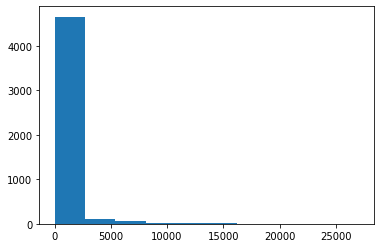

In [151]:
plt.hist(plot_df[sample_pool])

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TCGAAOA0JM01A21RA05607all', ylabel='percentile_rank'>

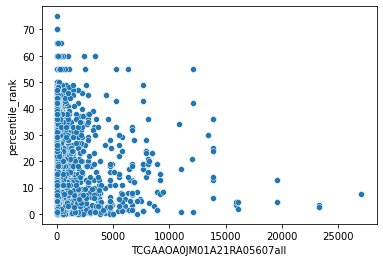

In [152]:
sns.scatterplot( plot_df[sample_pool], plot_df['percentile_rank'])

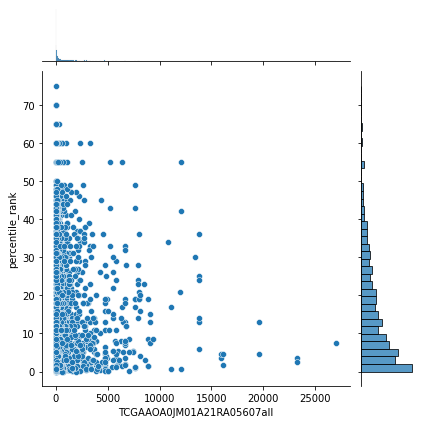

In [153]:
sns.jointplot(data=plot_df, x=sample_pool, y="percentile_rank")

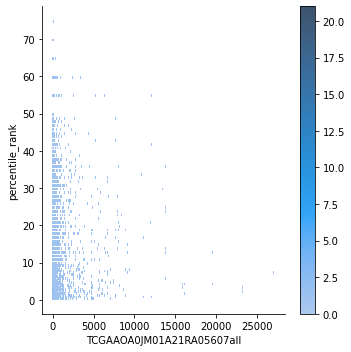

In [154]:
sns.displot(data=plot_df, x=sample_pool, y="percentile_rank", binwidth=(2, .5), cbar=True)

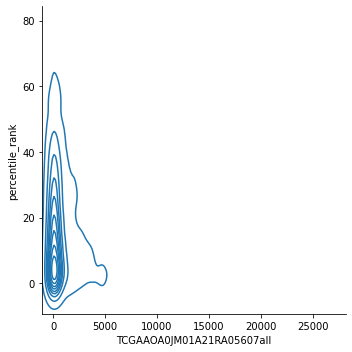

In [155]:
sns.displot(data=plot_df, x=sample_pool, y="percentile_rank", kind='kde')

<AxesSubplot:xlabel='junctionAnnotated', ylabel='#cancer_samples'>

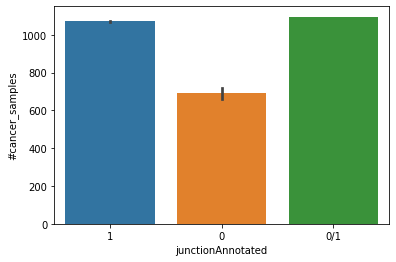

In [156]:
sns.barplot(data=plot_df_almost_unique, y="#cancer_samples", x = 'junctionAnnotated')

<AxesSubplot:xlabel='junctionAnnotated', ylabel='#cancer_samples'>

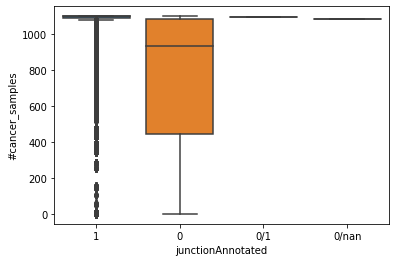

In [130]:
sns.boxplot(data=df, y="#cancer_samples" , x = 'junctionAnnotated')

<AxesSubplot:xlabel='junctionAnnotated_readFrameAnnotated', ylabel='#cancer_samples'>

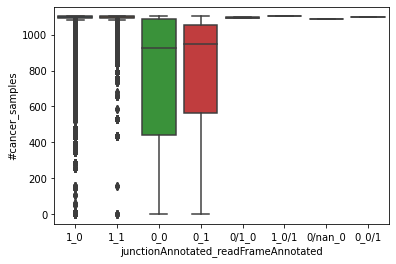

In [158]:
sns.boxplot(data=df, y="#cancer_samples" , x = 'junctionAnnotated_readFrameAnnotated')

<AxesSubplot:xlabel='#cancer_samples'>

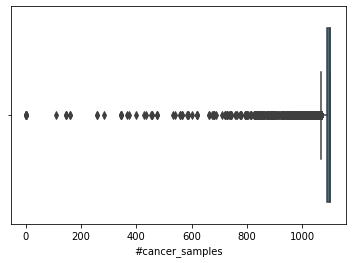

In [126]:
sns.boxplot(data=plot_df_almost_unique[plot_df_almost_unique['junctionAnnotated'] == '1'], 
         x="#cancer_samples")

# Validated

In [105]:
validated = df.loc[df['validated_peptide'] == 1]

In [106]:
validated['peptide'].unique().shape

(4309,)

In [107]:
validated['kmer'].unique().shape

(4964,)

In [108]:
validated['gene'].unique().shape

(1879,)

In [109]:
validated.groupby(['junctionAnnotated', 'readFrameAnnotated']).count()

>pepID  jx_pos  between_codons  \
junctionAnnotated readFrameAnnotated                                   
0                 0                     1453    1453            1453   
                  0/1                     16      16              16   
                  1                      189     189             189   
0/1               0                        2       2               2   
1                 0                     8918    8918            8918   
                  0/1                     24      24              24   
                  1                     1111    1111            1111   

                                      includes_5'  includes_3'  gene  \
junctionAnnotated readFrameAnnotated                                   
0                 0                          1453         1453  1453   
                  0/1                          16           16    16   
                  1                           189          189   189   
0/1               0                             2            2     2   
1                 0                          8918         8918  8918   
                  0/1                          24           24    24   
                  1                          1111         1111  1111   

                                      jx_coord  kmer  peptide  \
junctionAnnotated readFrameAnnotated                            
0                 0                       1453  1453     1453   
                  0/1                       16    16       16   
                  1                        189   189      189   
0/1               0                          2     2        2   
1                 0                       8918  8918     8918   
                  0/1                       24    24       24   
                  1                       1111  1111     1111   

                                      validated_peptide  validated_kmer  \
junctionAnnotated readFrameAnnotated                                      
0                 0                                1453            1453   
                  0/1                                16              16   
                  1                                 189             189   
0/1               0                                   2               2   
1                 0                                8918            8918   
                  0/1                                24              24   
                  1                                1111            1111   

                                      max_detections  \
junctionAnnotated readFrameAnnotated                   
0                 0                             1453   
                  0/1                             16   
                  1                              189   
0/1               0                                2   
1                 0                             8918   
                  0/1                             24   
                  1                             1111   

                                      TCGAAOA0JM01A21RA05607all  \
junctionAnnotated readFrameAnnotated                              
0                 0                                        1371   
                  0/1                                        16   
                  1                                         179   
0/1               0                                           2   
1                 0                                        8907   
                  0/1                                        24   
                  1                                        1111   

                                      percentile_rank  affinity  \
junctionAnnotated readFrameAnnotated                              
0                 0                              1371      1371   
                  0/1                              16        16   
                  1                               179       179   
0/1               0               